In [7]:
import resiliencyTool as rt
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt

import seaborn as sns

warnings.simplefilter("ignore") # warning are ignored for now

In [8]:
simulationName = 'strata_example'
network = rt.network.Network(simulationName)
simulation = rt.simulation.Sim(simulationName)

simulation.initialize_model_rp(network=network,
                               filename="return_period.csv",
                               iterationNumber=1,
                               maxTotalIteration=50,
                               cv=0.05)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


start= 1, stop= 41
start= 12, stop= 17

Strata  3
Sample size  48
Strata  4
Sample size  29
Strata  5
Sample size  20
Strata  6
Sample size  16
Strata  7
Sample size  14
-----------------
 Kmeans solution 
-----------------
 *** Domain:  1  ***
 Number of strata:  7
 Sample size     :  14
Computations are being done on population data

Number of strata:  7
... of which with only one unit:  0
Input data have been checked and are compliant with requirements

 *** Domain :  1   1
 Number of strata :  10000
 *** Sample cost:  14
 *** Number of strata:  7
 *** Sample size :  14
 *** Number of strata :  7
---------------------------Strata = 0
number of samples = 2.0
Intensity samples between 0.7220000455295155 and 0.7685946646304719
Strata = 1
number of samples = 2.0
Intensity samples between 0.7686146122852712 and 0.8232564256102357
Strata = 2
number of samples = 2.0
Intensity samples between 0.8232854838577821 and 0.8891335408041477
Strata = 3
number of samples = 2.0
Intensity samples betw

<AxesSubplot:xlabel='return_period', ylabel='intensity'>

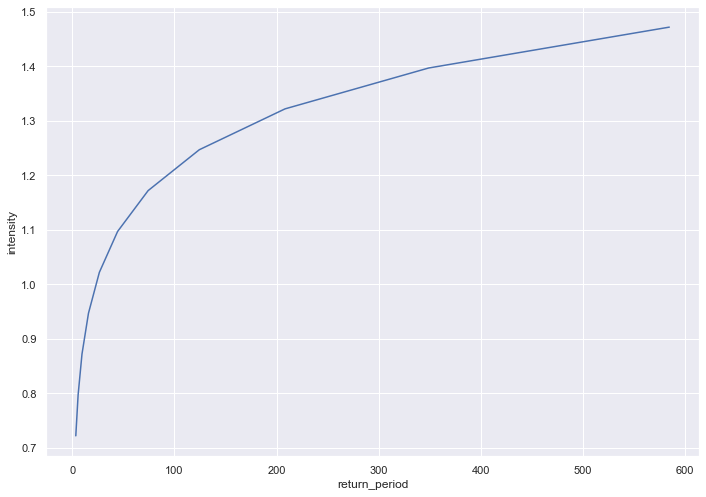

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=network.return_period.df_return_period, x='return_period', y='intensity')

In [10]:
simulation.stratResults

,Domain,Stratum,Population,Allocation,SamplingRate,Lower_X1,Upper_X1
1,1.0,1,2755.0,2.0,0.000726,0.722000,0.768595
2,1.0,2,2284.0,2.0,0.000876,0.768615,0.823256
3,1.0,3,1823.0,2.0,0.001097,0.823285,0.889134
4,1.0,4,1376.0,2.0,0.001453,0.889179,0.971558
5,1.0,5,950.0,2.0,0.002105,0.971638,1.080344
6,1.0,6,564.0,2.0,0.003546,1.080514,1.237693
7,1.0,7,248.0,2.0,0.008065,1.238197,1.521999


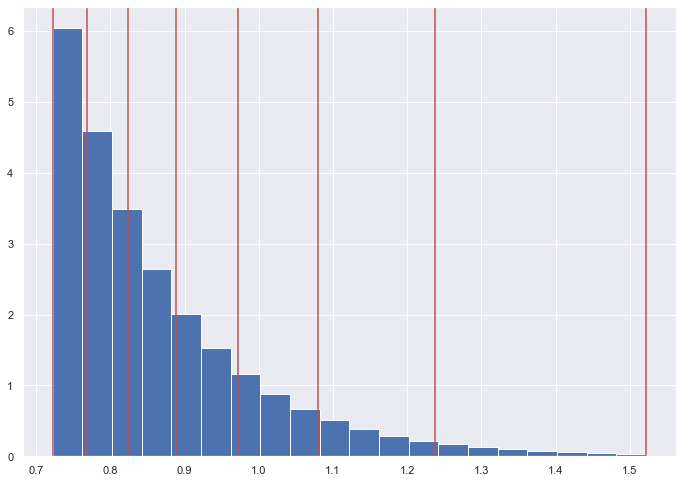

In [11]:
plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

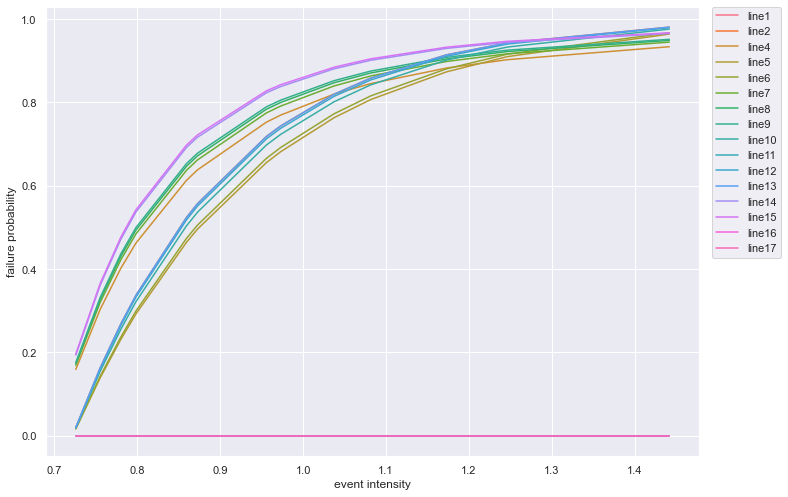

In [12]:
df = simulation.failureProbs[simulation.failureProbs['element type']=='Line']
sns.lineplot(data=df, x='event intensity', y='failure probability', hue='power element')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)